In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pylab as plt
import seaborn as sns

import folium 
from folium import plugins

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/chile-arthquakes-1705-2020/chile_earthquakes_1520-2024.tsv


# 1- Data loading:

In [2]:
data = pd.read_csv("/kaggle/input/chile-arthquakes-1705-2020/chile_earthquakes_1520-2024.tsv", delimiter='\t')
data.head()

,Search Parameters,Year,Mo,Dy,Hr,Mn,Tsu,Country,Location Name,Latitude,Longitude,Focal Depth (km),Mag,Deaths,Missing,Injuries,Damage ($Mil),Houses Destroyed,Houses Damaged
0,"[""Region = 160 - South America"",""Country = CHI...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,1520.0,NaN,NaN,NaN,NaN,NaN,CHILE,CHILE,-40.00,-74.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,1543.0,NaN,NaN,NaN,NaN,NaN,CHILE,CHILE,-19.00,-70.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,1562.0,10.0,28.0,10.0,NaN,178.0,CHILE,CHILE,-38.70,-73.5,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,1570.0,2.0,8.0,13.0,NaN,179.0,CHILE,CHILE: OLD CONCEPCION,-36.75,-73.0,NaN,8.3,NaN,NaN,NaN,NaN,NaN,NaN


# 2- Initial exploration

In [3]:
data.columns

Index(['Search Parameters', 'Year', 'Mo', 'Dy', 'Hr', 'Mn', 'Tsu', 'Country',
       'Location Name', 'Latitude', 'Longitude', 'Focal Depth (km)', 'Mag',
       'Deaths', 'Missing', 'Injuries', 'Damage ($Mil)', 'Houses Destroyed',
       'Houses Damaged'],
      dtype='object')

In [4]:
data.shape

(199, 19)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Search Parameters  1 non-null      object 
 1   Year               198 non-null    float64
 2   Mo                 195 non-null    float64
 3   Dy                 193 non-null    float64
 4   Hr                 151 non-null    float64
 5   Mn                 147 non-null    float64
 6   Tsu                145 non-null    float64
 7   Country            198 non-null    object 
 8   Location Name      198 non-null    object 
 9   Latitude           198 non-null    float64
 10  Longitude          198 non-null    float64
 11  Focal Depth (km)   110 non-null    float64
 12  Mag                146 non-null    float64
 13  Deaths             53 non-null     float64
 14  Missing            2 non-null      float64
 15  Injuries           23 non-null     float64
 16  Damage ($Mil)      18 non-

In [6]:
data.describe()

,Year,Mo,Dy,Hr,Mn,Tsu,Latitude,Longitude,Focal Depth (km),Mag,Deaths,Missing,Injuries,Damage ($Mil),Houses Destroyed,Houses Damaged
count,198.000000,195.000000,193.000000,151.000000,147.000000,145.000000,198.000000,198.000000,110.000000,146.000000,53.000000,2.000000,23.000000,18.000000,13.000000,7.000000
mean,1900.964646,7.056410,15.264249,11.596026,27.891156,1901.062069,-29.596884,-71.772197,43.463636,7.245890,1212.754717,15.500000,854.086957,1952.405556,5308.923077,75711.714286
std,104.528352,3.462896,8.145015,6.981097,17.284140,1512.073701,7.793224,4.296843,27.407451,0.801303,5314.639614,20.506097,2553.936995,7013.375044,16078.812583,187185.176819
min,1520.000000,1.000000,1.000000,0.000000,0.000000,178.000000,-54.000000,-113.436000,4.000000,5.000000,1.000000,1.000000,1.000000,0.400000,16.000000,2.000000
25%,1868.000000,4.000000,9.000000,5.000000,14.000000,1023.000000,-34.250250,-72.005750,28.000000,6.725000,2.000000,8.250000,13.500000,1.615000,101.000000,818.000000
50%,1925.500000,7.000000,15.000000,12.000000,29.000000,1555.000000,-29.975000,-71.240000,34.000000,7.300000,5.000000,15.500000,40.000000,100.000000,339.000000,2600.000000
75%,1972.750000,10.000000,22.000000,17.000000,42.000000,2023.000000,-22.500000,-70.350000,59.500000,7.800000,57.000000,22.750000,250.000000,575.000000,1000.000000,12872.000000
max,2020.000000,12.000000,31.000000,23.000000,59.000000,5760.000000,-17.678000,-67.500000,130.000000,9.500000,30000.000000,30.000000,12000.000000,30000.000000,58622.000000,500000.000000


# 3 - Data cleaning

### There are some columns that are unnecessary and need to be removed or cleaned.


In [7]:
# Remove the first row 'Search Parameters'
data = data.drop('Search Parameters', axis=1)
data.head()

,Year,Mo,Dy,Hr,Mn,Tsu,Country,Location Name,Latitude,Longitude,Focal Depth (km),Mag,Deaths,Missing,Injuries,Damage ($Mil),Houses Destroyed,Houses Damaged
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1520.0,NaN,NaN,NaN,NaN,NaN,CHILE,CHILE,-40.00,-74.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1543.0,NaN,NaN,NaN,NaN,NaN,CHILE,CHILE,-19.00,-70.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1562.0,10.0,28.0,10.0,NaN,178.0,CHILE,CHILE,-38.70,-73.5,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN
4,1570.0,2.0,8.0,13.0,NaN,179.0,CHILE,CHILE: OLD CONCEPCION,-36.75,-73.0,NaN,8.3,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Remove rows with all values null
data=data.dropna(how='all')
data.head()

,Year,Mo,Dy,Hr,Mn,Tsu,Country,Location Name,Latitude,Longitude,Focal Depth (km),Mag,Deaths,Missing,Injuries,Damage ($Mil),Houses Destroyed,Houses Damaged
1,1520.0,NaN,NaN,NaN,NaN,NaN,CHILE,CHILE,-40.00,-74.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1543.0,NaN,NaN,NaN,NaN,NaN,CHILE,CHILE,-19.00,-70.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1562.0,10.0,28.0,10.0,NaN,178.0,CHILE,CHILE,-38.70,-73.5,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN
4,1570.0,2.0,8.0,13.0,NaN,179.0,CHILE,CHILE: OLD CONCEPCION,-36.75,-73.0,NaN,8.3,NaN,NaN,NaN,NaN,NaN,NaN
5,1575.0,12.0,16.0,18.0,30.0,185.0,CHILE,CHILE: VALDIVIA,-39.80,-73.2,NaN,8.5,21.0,NaN,NaN,NaN,NaN,NaN


In [9]:
# Cleaning 'Location Name' column, remove 'CHILE: '
data['Location Name'] = data['Location Name'].str.replace('CHILE: ', '')
data.tail(15)

,Year,Mo,Dy,Hr,Mn,Tsu,Country,Location Name,Latitude,Longitude,Focal Depth (km),Mag,Deaths,Missing,Injuries,Damage ($Mil),Houses Destroyed,Houses Damaged
184,2012.0,5.0,14.0,10.0,0.0,NaN,CHILE,ARICA; PERU: TACNA,-17.678,-69.591,10.0,6.3,NaN,NaN,NaN,NaN,NaN,NaN
185,2014.0,3.0,16.0,21.0,16.0,5555.0,CHILE,IQUIQUE,-19.981,-70.702,20.0,6.7,NaN,NaN,NaN,NaN,NaN,NaN
186,2014.0,4.0,1.0,23.0,46.0,5557.0,CHILE,"NORTHERN: IQUIQUE, ALTO HOSPICIO",-19.610,-70.769,25.0,8.2,7.0,NaN,NaN,100.0,NaN,2600.0
187,2014.0,4.0,3.0,2.0,43.0,5558.0,CHILE,NORTHERN: IQUIQUE,-20.571,-70.493,22.0,7.7,NaN,NaN,NaN,NaN,NaN,NaN
188,2014.0,10.0,9.0,2.0,14.0,5577.0,CHILE,EASTER ISLAND REGION,-32.108,-110.811,17.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN
189,2015.0,9.0,16.0,22.0,54.0,5590.0,CHILE,CENTRAL,-31.573,-71.674,22.0,8.3,7.0,1.0,14.0,600.0,2305.0,10044.0
190,2015.0,11.0,11.0,1.0,54.0,5592.0,CHILE,LA SERENA,-29.507,-72.007,12.0,6.9,NaN,NaN,NaN,NaN,NaN,NaN
191,2016.0,12.0,25.0,14.0,22.0,5637.0,CHILE,CHILE,-43.406,-73.941,38.0,7.6,NaN,NaN,NaN,NaN,NaN,NaN
192,2017.0,4.0,24.0,21.0,38.0,5647.0,CHILE,VALPARAISO,-33.038,-72.062,28.0,6.9,NaN,NaN,NaN,NaN,NaN,NaN
193,2017.0,8.0,2.0,7.0,15.0,NaN,CHILE,SANTIAGO,-33.212,-70.626,92.0,5.4,1.0,NaN,NaN,NaN,NaN,NaN


In [10]:
# Cleaning 'Location Name' column. Some rows have data from Chile and Peru, everything is eliminated except the name of the Chilean cities. 
data['Location Name'] = data['Location Name'].str.split(';').str[0].str.lstrip()
data.tail(15)

,Year,Mo,Dy,Hr,Mn,Tsu,Country,Location Name,Latitude,Longitude,Focal Depth (km),Mag,Deaths,Missing,Injuries,Damage ($Mil),Houses Destroyed,Houses Damaged
184,2012.0,5.0,14.0,10.0,0.0,NaN,CHILE,ARICA,-17.678,-69.591,10.0,6.3,NaN,NaN,NaN,NaN,NaN,NaN
185,2014.0,3.0,16.0,21.0,16.0,5555.0,CHILE,IQUIQUE,-19.981,-70.702,20.0,6.7,NaN,NaN,NaN,NaN,NaN,NaN
186,2014.0,4.0,1.0,23.0,46.0,5557.0,CHILE,"NORTHERN: IQUIQUE, ALTO HOSPICIO",-19.610,-70.769,25.0,8.2,7.0,NaN,NaN,100.0,NaN,2600.0
187,2014.0,4.0,3.0,2.0,43.0,5558.0,CHILE,NORTHERN: IQUIQUE,-20.571,-70.493,22.0,7.7,NaN,NaN,NaN,NaN,NaN,NaN
188,2014.0,10.0,9.0,2.0,14.0,5577.0,CHILE,EASTER ISLAND REGION,-32.108,-110.811,17.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN
189,2015.0,9.0,16.0,22.0,54.0,5590.0,CHILE,CENTRAL,-31.573,-71.674,22.0,8.3,7.0,1.0,14.0,600.0,2305.0,10044.0
190,2015.0,11.0,11.0,1.0,54.0,5592.0,CHILE,LA SERENA,-29.507,-72.007,12.0,6.9,NaN,NaN,NaN,NaN,NaN,NaN
191,2016.0,12.0,25.0,14.0,22.0,5637.0,CHILE,CHILE,-43.406,-73.941,38.0,7.6,NaN,NaN,NaN,NaN,NaN,NaN
192,2017.0,4.0,24.0,21.0,38.0,5647.0,CHILE,VALPARAISO,-33.038,-72.062,28.0,6.9,NaN,NaN,NaN,NaN,NaN,NaN
193,2017.0,8.0,2.0,7.0,15.0,NaN,CHILE,SANTIAGO,-33.212,-70.626,92.0,5.4,1.0,NaN,NaN,NaN,NaN,NaN


In [11]:
# Cleaning 'Location Name' column, remove regions and keep only the name of the cities.
data['Location Name'] = data['Location Name'].str.split(':').str[-1].str.lstrip()
data.tail(15)

,Year,Mo,Dy,Hr,Mn,Tsu,Country,Location Name,Latitude,Longitude,Focal Depth (km),Mag,Deaths,Missing,Injuries,Damage ($Mil),Houses Destroyed,Houses Damaged
184,2012.0,5.0,14.0,10.0,0.0,NaN,CHILE,ARICA,-17.678,-69.591,10.0,6.3,NaN,NaN,NaN,NaN,NaN,NaN
185,2014.0,3.0,16.0,21.0,16.0,5555.0,CHILE,IQUIQUE,-19.981,-70.702,20.0,6.7,NaN,NaN,NaN,NaN,NaN,NaN
186,2014.0,4.0,1.0,23.0,46.0,5557.0,CHILE,"IQUIQUE, ALTO HOSPICIO",-19.610,-70.769,25.0,8.2,7.0,NaN,NaN,100.0,NaN,2600.0
187,2014.0,4.0,3.0,2.0,43.0,5558.0,CHILE,IQUIQUE,-20.571,-70.493,22.0,7.7,NaN,NaN,NaN,NaN,NaN,NaN
188,2014.0,10.0,9.0,2.0,14.0,5577.0,CHILE,EASTER ISLAND REGION,-32.108,-110.811,17.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN
189,2015.0,9.0,16.0,22.0,54.0,5590.0,CHILE,CENTRAL,-31.573,-71.674,22.0,8.3,7.0,1.0,14.0,600.0,2305.0,10044.0
190,2015.0,11.0,11.0,1.0,54.0,5592.0,CHILE,LA SERENA,-29.507,-72.007,12.0,6.9,NaN,NaN,NaN,NaN,NaN,NaN
191,2016.0,12.0,25.0,14.0,22.0,5637.0,CHILE,CHILE,-43.406,-73.941,38.0,7.6,NaN,NaN,NaN,NaN,NaN,NaN
192,2017.0,4.0,24.0,21.0,38.0,5647.0,CHILE,VALPARAISO,-33.038,-72.062,28.0,6.9,NaN,NaN,NaN,NaN,NaN,NaN
193,2017.0,8.0,2.0,7.0,15.0,NaN,CHILE,SANTIAGO,-33.212,-70.626,92.0,5.4,1.0,NaN,NaN,NaN,NaN,NaN


### The 'tsu' column contains information about the tsunamis associated with each earthquake if they occurred. For our analysis we are only interested in whether a tsunami occurred or not, for this reason the column will be in the format 'Yes' if a tsunami occurred or 'No/No data' if the cell is blank.

In [12]:
# Cleaning the 'Tsu' column
data['Tsu'] = data['Tsu'].apply(lambda x: 'Yes' if pd.notna(x) else 'No/No data')
data.head(10)

,Year,Mo,Dy,Hr,Mn,Tsu,Country,Location Name,Latitude,Longitude,Focal Depth (km),Mag,Deaths,Missing,Injuries,Damage ($Mil),Houses Destroyed,Houses Damaged
1,1520.0,NaN,NaN,NaN,NaN,No/No data,CHILE,CHILE,-40.00,-74.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1543.0,NaN,NaN,NaN,NaN,No/No data,CHILE,CHILE,-19.00,-70.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1562.0,10.0,28.0,10.0,NaN,Yes,CHILE,CHILE,-38.70,-73.50,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN
4,1570.0,2.0,8.0,13.0,NaN,Yes,CHILE,OLD CONCEPCION,-36.75,-73.00,NaN,8.3,NaN,NaN,NaN,NaN,NaN,NaN
5,1575.0,12.0,16.0,18.0,30.0,Yes,CHILE,VALDIVIA,-39.80,-73.20,NaN,8.5,21.0,NaN,NaN,NaN,NaN,NaN
6,1604.0,12.0,NaN,NaN,NaN,No/No data,CHILE,CHILE,-29.90,-71.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1615.0,9.0,16.0,NaN,NaN,Yes,CHILE,ARICA,-18.50,-70.35,NaN,7.5,NaN,NaN,NaN,NaN,NaN,NaN
8,1633.0,5.0,14.0,NaN,NaN,Yes,CHILE,FORT CARELMAPU,-41.80,-73.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1639.0,12.0,NaN,NaN,NaN,No/No data,CHILE,CHILE,-30.00,-71.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,1647.0,5.0,14.0,2.0,30.0,No/No data,CHILE,SANTIAGO,-33.40,-70.60,NaN,8.5,1000.0,NaN,NaN,NaN,300.0,NaN


# 4 - Represent the earthquakes on a map

In [13]:
# Generate map of Chile using the librarie folium
Chile_map = folium.Map(location=[-35.6751, -71.5430], zoom_start=4)

In [14]:
# Represent data about earthquakes with different colors depending on their magnitude
for lat, lng, mag, label in zip(data['Latitude'], data['Longitude'], data['Mag'], data['Location Name']):
    if mag < 5.0:
        color = 'lightgreen'
    elif 5.0 <= mag < 6.0:
        color = 'green'
    elif 6.0 <= mag < 7.0:
        color = 'orange'
    elif 7.0 <= mag < 8.0:
        color = 'red'
    elif mag >= 8.0:
        color = 'darkred'
    else:
        color = 'lightblue'
    
    folium.Marker(
        location=[lat, lng],
        icon=folium.Icon(color=color, icon='circle', prefix='fa'),
        popup=f"{label}, Magnitud: {mag}",
    ).add_to(Chile_map)
    
Chile_map

In [15]:
# Save earthquake map in html format
Chile_map.save('/kaggle/working/Chile_map.html')

In [16]:
# Generate another map of Chile using the librarie folium
Chile_map_cluster = folium.Map(location=[-35.6751, -71.5430], zoom_start=4)

In [17]:
# Group earthquakes 
earthquakes = plugins.MarkerCluster().add_to(Chile_map_cluster)

for lat, lng, mag, label in zip(data['Latitude'], data['Longitude'], data['Mag'], data['Location Name']):
    
    folium.Marker(
        location=[lat, lng],
        icon=folium.Icon(color='blue', icon='circle', prefix='fa'),
        popup=f"{label}, Magnitude: {mag}",
    ).add_to(earthquakes)
    
Chile_map_cluster.add_child(earthquakes)

In [18]:
# Save earthquake map in html format
Chile_map_cluster.save('/kaggle/working/Chile_map_cluster.html')

# 5 - Top 10 earthquakes by Magnitude

In [19]:
earthquakes_by_mag_sorted = data.sort_values(by='Mag', ascending=False)
earthquakes_by_mag = earthquakes_by_mag_sorted[['Year', 'Location Name', 'Mag']]

earthquakes_by_mag.head(10)

,Year,Location Name,Mag
131,1960.0,"PUERTO MONTT, VALDIVIA",9.5
16,1730.0,VALPARAISO,9.1
179,2010.0,"MAULE, CONCEPCION, TALCAHUANO",8.8
48,1868.0,ARICA,8.5
27,1822.0,"VALPARAISO, QUILLOTA, CONCON, ACONCAGUA",8.5
26,1819.0,COPIAPO,8.5
49,1868.0,ARICA,8.5
19,1751.0,"CONCEPCION, CHILLAN, TALCA, TUTUBEN, CURICO",8.5
34,1837.0,VALDIVIA,8.5
10,1647.0,SANTIAGO,8.5


# 6 - Top 25 years with more number of bif earthquakes

In [20]:
# Group by 'Year' and count the number of earthquakes and sort it by number of earthquakes
earthquakes_by_year = data.groupby('Year').size().reset_index(name='Count')

earthquakes_by_year_sorted = earthquakes_by_year.sort_values(by='Count', ascending=False).reset_index(drop=True)

top_25_years_by_earthquakes_count = earthquakes_by_year_sorted.head(25)

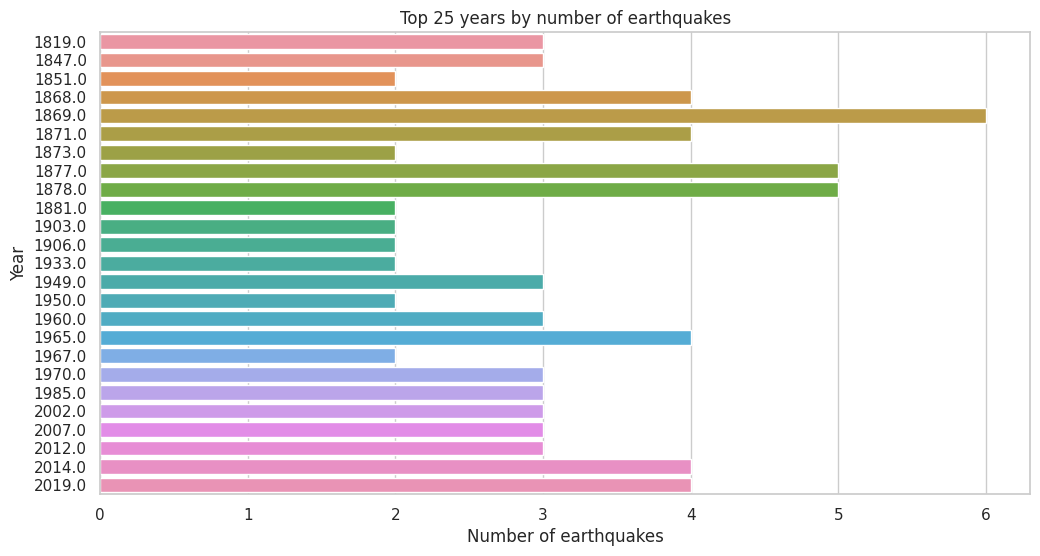

In [21]:
# Bar graph of the 25 years with the most earthquakes
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")  
colors = sns.color_palette("viridis", len(top_25_years_by_earthquakes_count))
sns.barplot(x='Count', y='Year', data=top_25_years_by_earthquakes_count, orient='h')
plt.title('Top 25 years by number of earthquakes')
plt.xlabel('Number of earthquakes')
plt.ylabel('Year')
plt.show()

# 7 - Top 10 most destructive earthquakes in $ Millions

In [22]:
earthquakes_by_mag_sorted = data.sort_values(by='Damage ($Mil)', ascending=False)
earthquakes_by_mag = earthquakes_by_mag_sorted[['Year', 'Location Name', 'Mag', 'Damage ($Mil)', 'Houses Destroyed', 'Houses Damaged']]

earthquakes_by_mag.head(10)

,Year,Location Name,Mag,Damage ($Mil),Houses Destroyed,Houses Damaged
179,2010.0,"MAULE, CONCEPCION, TALCAHUANO",8.8,30000.0,NaN,500000.0
157,1985.0,"CENTRAL COAST, SAN ANTONIO, VALPARAISO",8.0,1500.0,NaN,NaN
131,1960.0,"PUERTO MONTT, VALDIVIA",9.5,1000.0,58622.0,NaN
111,1939.0,CHILLAN,8.3,920.0,NaN,NaN
189,2015.0,CENTRAL,8.3,600.0,2305.0,10044.0
123,1953.0,"CHILLAN, CONCEPCION",7.6,500.0,NaN,NaN
146,1971.0,CENTRAL,7.8,236.4,NaN,NaN
137,1965.0,CENTRAL,7.3,125.0,NaN,NaN
88,1906.0,SOUTH CENTRAL,8.2,100.0,NaN,NaN
186,2014.0,"IQUIQUE, ALTO HOSPICIO",8.2,100.0,NaN,2600.0


# 8 - Percentage of earthquakes that caused a Tsunami

In [23]:
tsunamis = data[data['Tsu'] == 'Yes']
total_tsunamis = tsunamis.shape[0]

total_earthquakes = data.shape[0]

percentage_tsu = round((total_tsunamis / total_earthquakes * 100),2)
percentage_tsu

73.23